In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time

from collections import Counter
from datetime import timedelta
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
all_sales_desc=pd.read_csv("all_sales_202401251719.csv")
all_sales_desc.head(5)

C:\Users\ychen\AppData\Local\Temp\ipykernel_33748\1155498495.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  all_sales_desc=pd.read_csv("all_sales_202401251719.csv")


,so_key,scen_id,trans_type_desc,sls,bill_to,trans_cogs,qty_ship,item_cde,item_key,masteritemcode,legacy_prod_seg_cde,prod_desc,invc_date,legacy_prod_seg_name,productcategory_1,productcategory_2,productcategory_3,productcategory_4
0,8349840091,202312.0,INVOICE,63.68,03089771,-41.33,2.0,10062645,5542136.0,10062645,FS,711503 BATHROOM CLEANER 1 QT SPARTAN M95 CONCE...,2023-12-12 00:00:00.000,Facility Solutions,Chemicals,Cleaners,NaN,Branded
1,8305401619,202311.0,INVOICE,318.40,03089771,-203.42,10.0,10062645,5542136.0,10062645,FS,711503 BATHROOM CLEANER 1 QT SPARTAN M95 CONCE...,2023-11-17 00:00:00.000,Facility Solutions,Chemicals,Cleaners,NaN,Branded
2,7610736774,202301.0,INVOICE,41.09,03089771,-28.02,1.0,10043301,5524054.0,10043301,FS,308603 AIR FRESHENER 1 QUART SPARTAN AIRLIFT S...,2023-01-26 00:00:00.000,Facility Solutions,Chemicals,"Air Care / Odor Control (Deodorizers, Neutrali...",NaN,Branded
3,7657008733,202302.0,INVOICE,181.70,03089771,-130.52,2.0,10778409,913872855.0,10778409,FS,PLC-8 CUP 8OZ ASEAN PLANET+ PAPER BIOPOLYMER L...,2023-02-14 00:00:00.000,Facility Solutions,Food Service,Cups / Lids,Paper,Branded
4,7657008733,202302.0,INVOICE,75.17,03089771,-48.79,1.0,10437411,5815170.0,10437411,FS,700905 LAUNDRY SOUR/SOFTENER 5GAL SPARTAN,2023-02-14 00:00:00.000,Facility Solutions,Chemicals,Laundry Products,NaN,Branded


# Read ecom data and merge

In [3]:
%%time

data_ecom=pd.read_excel('all_items_site.xlsx')
data_inter = pd.merge(data_ecom, all_sales_desc, left_on='Item Number', right_on='item_cde')

CPU times: total: 2min 19s
Wall time: 2min 33s


In [4]:
data_inter.head(5)

,Item Exclusion,Item Number,Taxonomy Node,Web Hierarchy,Product Type,Product Title,Item Description,Description (eCommerce),Short Description,Keywords,...,item_key,masteritemcode,legacy_prod_seg_cde,prod_desc,invc_date,legacy_prod_seg_name,productcategory_1,productcategory_2,productcategory_3,productcategory_4
0,NaN,10477982,Facility Maintenance.Cleaning Tools.Cleaning &...,Facility Maintenance.Cleaning Tools.Cleaning &...,WIPE,Oxivir® TB White Disinfect Deodor Wipes (6 in....,4599516 WIPE 6X7 DIVERSEY OXIVIR TB DISINFECT ...,The Oxivir® TB White Disinfect Deodor Wipes (6...,4599516 WIPE 6X7 DIVERSEY OXIVIR TB DISINFECT ...,"Deodor Wipe, One-step wipe",...,5849309.0,10477982,FS,4599516 WIPE 6X7 DIVERSEY OXIVIR TB DISINFECT ...,2023-03-20 00:00:00.000,Facility Solutions,Wipers,Chemical Wipers,NaN,Branded
1,NaN,10477982,Facility Maintenance.Cleaning Tools.Cleaning &...,Facility Maintenance.Cleaning Tools.Cleaning &...,WIPE,Oxivir® TB White Disinfect Deodor Wipes (6 in....,4599516 WIPE 6X7 DIVERSEY OXIVIR TB DISINFECT ...,The Oxivir® TB White Disinfect Deodor Wipes (6...,4599516 WIPE 6X7 DIVERSEY OXIVIR TB DISINFECT ...,"Deodor Wipe, One-step wipe",...,5849309.0,10477982,FS,4599516 WIPE 6X7 DIVERSEY OXIVIR TB DISINFECT ...,2023-03-20 00:00:00.000,Facility Solutions,Wipers,Chemical Wipers,NaN,Branded
2,NaN,10477982,Facility Maintenance.Cleaning Tools.Cleaning &...,Facility Maintenance.Cleaning Tools.Cleaning &...,WIPE,Oxivir® TB White Disinfect Deodor Wipes (6 in....,4599516 WIPE 6X7 DIVERSEY OXIVIR TB DISINFECT ...,The Oxivir® TB White Disinfect Deodor Wipes (6...,4599516 WIPE 6X7 DIVERSEY OXIVIR TB DISINFECT ...,"Deodor Wipe, One-step wipe",...,5849309.0,10477982,FS,4599516 WIPE 6X7 DIVERSEY OXIVIR TB DISINFECT ...,2023-06-14 00:00:00.000,Facility Solutions,Wipers,Chemical Wipers,NaN,Branded
3,NaN,10477982,Facility Maintenance.Cleaning Tools.Cleaning &...,Facility Maintenance.Cleaning Tools.Cleaning &...,WIPE,Oxivir® TB White Disinfect Deodor Wipes (6 in....,4599516 WIPE 6X7 DIVERSEY OXIVIR TB DISINFECT ...,The Oxivir® TB White Disinfect Deodor Wipes (6...,4599516 WIPE 6X7 DIVERSEY OXIVIR TB DISINFECT ...,"Deodor Wipe, One-step wipe",...,5849308.0,10477982,FS,4599516 WIPE 6X7 DIVERSEY OXIVIR TB DISINFECT ...,2023-08-14 00:00:00.000,Facility Solutions,Wipers,Chemical Wipers,NaN,Branded
4,NaN,10477982,Facility Maintenance.Cleaning Tools.Cleaning &...,Facility Maintenance.Cleaning Tools.Cleaning &...,WIPE,Oxivir® TB White Disinfect Deodor Wipes (6 in....,4599516 WIPE 6X7 DIVERSEY OXIVIR TB DISINFECT ...,The Oxivir® TB White Disinfect Deodor Wipes (6...,4599516 WIPE 6X7 DIVERSEY OXIVIR TB DISINFECT ...,"Deodor Wipe, One-step wipe",...,5849308.0,10477982,FS,4599516 WIPE 6X7 DIVERSEY OXIVIR TB DISINFECT ...,2023-06-01 00:00:00.000,Facility Solutions,Wipers,Chemical Wipers,NaN,Branded


In [5]:
billto_itemfrequency = data_inter.groupby(['bill_to', 'invc_date', 'item_cde', 'so_key']).agg({'qty_ship': 'sum'}).reset_index()
billto_itemfrequency.head(20)

,bill_to,invc_date,item_cde,so_key,qty_ship
0,03001971,2023-01-04 00:00:00.000,10329848,7541163266,2.0
1,03001971,2023-01-04 00:00:00.000,10741667,7541168570,3.0
2,03001971,2023-01-25 00:00:00.000,10477982,7606007106,3.0
3,03001971,2023-01-25 00:00:00.000,10477982,7606007182,2.0
4,03001971,2023-01-25 00:00:00.000,20037815,7606005565,3.0
5,03001971,2023-01-31 00:00:00.000,10774631,7621113409,6.0
6,03001971,2023-02-14 00:00:00.000,10298253,7657007116,14.0
7,03001971,2023-02-20 00:00:00.000,11153989,7670629493,15.0
8,03001971,2023-02-22 00:00:00.000,10778330,7685587670,10.0
9,03001971,2023-02-22 00:00:00.000,11052543,7685587782,9.0


In [6]:
# Find the frequency of order by counting the number of so_key regarding bill_to on each day

billto_itemfrequency['invc_date'] = pd.to_datetime(billto_itemfrequency['invc_date'])

billto_itemfrequency = billto_itemfrequency.groupby(['bill_to', 'invc_date']).agg(
    item_cde=('item_cde', list),
    so_key=('so_key', list),
    qty_ship=('qty_ship', list),
    so_key_frequency=('so_key', lambda x: len(set(x)))  # Count unique 'so_key' values
).reset_index()

In [7]:
billto_itemfrequency

,bill_to,invc_date,item_cde,so_key,qty_ship,so_key_frequency
0,03001971,2023-01-04,"[10329848, 10741667]","[7541163266, 7541168570]","[2.0, 3.0]",2
1,03001971,2023-01-25,"[10477982, 10477982, 20037815]","[7606007106, 7606007182, 7606005565]","[3.0, 2.0, 3.0]",3
2,03001971,2023-01-31,[10774631],[7621113409],[6.0],1
3,03001971,2023-02-14,[10298253],[7657007116],[14.0],1
4,03001971,2023-02-20,[11153989],[7670629493],[15.0],1
...,...,...,...,...,...,...
13528,PC967039,2023-04-10,"[10098323, 10504858, 10941576]","[7804154774, 7804154774, 7804154774]","[2.0, 3.0, 2.0]",1
13529,PC967039,2023-08-23,[11056867],[8133754934],[6.0],1
13530,PC967039,2023-09-15,"[10042792, 10098323, 10504858, 10728685]","[8186727717, 8186727717, 8186727717, 8186727717]","[1.0, 2.0, 2.0, 12.0]",1
13531,PC967039,2023-09-19,[11056867],[8191868017],[6.0],1


In [8]:
# For inspection
billto_itemfrequency.to_csv('billto_itemfrequency.csv', index=False)

In [9]:
billto_itemfrequency.so_key_frequency.describe()

count    13533.000000
mean         1.197887
std          0.658404
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         11.000000
Name: so_key_frequency, dtype: float64

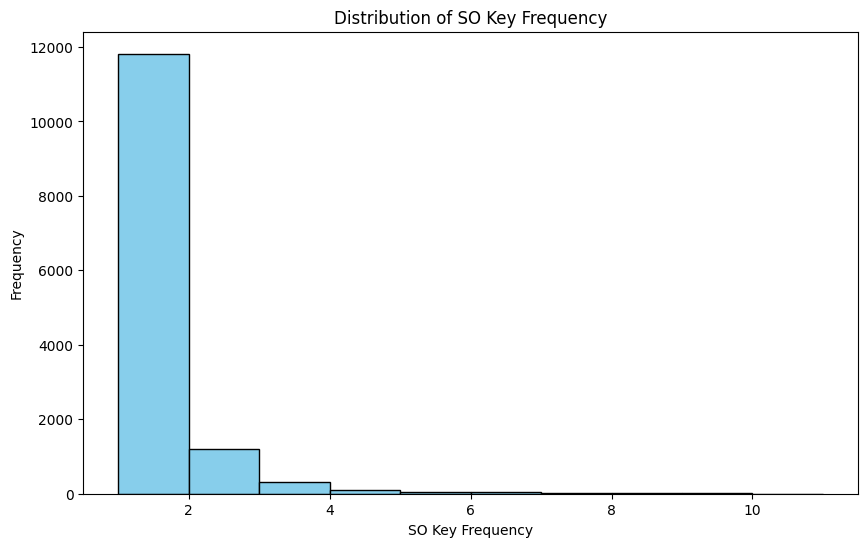

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(billto_itemfrequency['so_key_frequency'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of SO Key Frequency')
plt.xlabel('SO Key Frequency')
plt.ylabel('Frequency')
plt.show()

In [11]:
# Sorting the DataFrame by invc_date to ensure the plot is chronological
billto_itemfrequency_chronological = billto_itemfrequency.sort_values('invc_date')

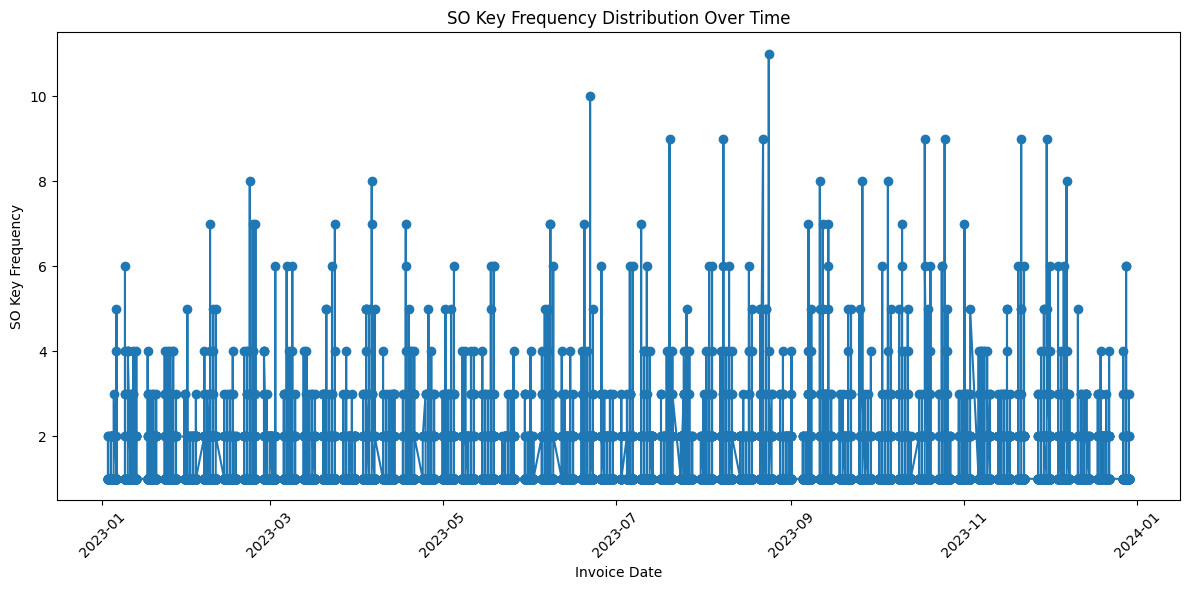

In [12]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(billto_itemfrequency_chronological['invc_date'], billto_itemfrequency_chronological['so_key_frequency'], 
         marker='o', linestyle='-')
plt.title('SO Key Frequency Distribution Over Time')
plt.xlabel('Invoice Date')
plt.ylabel('SO Key Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

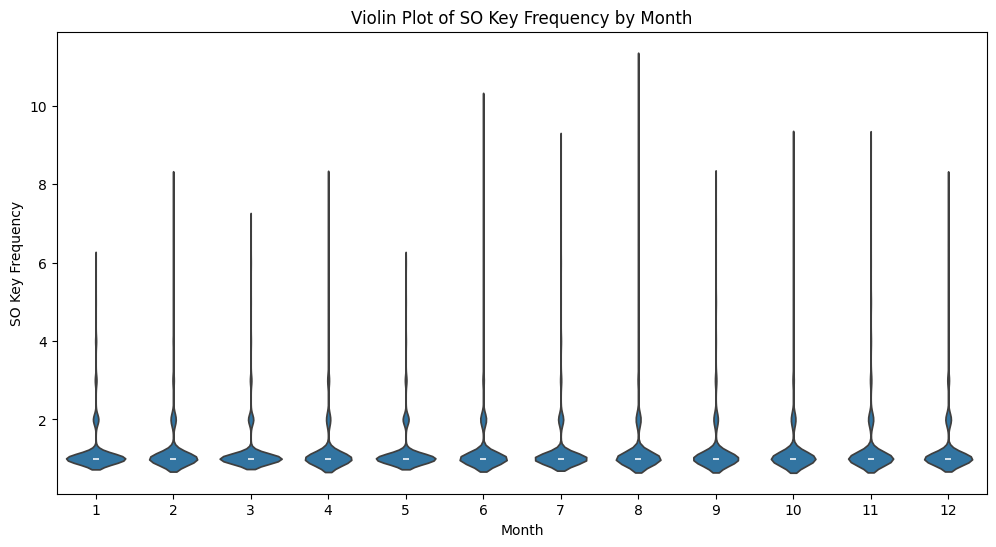

In [13]:
billto_plot = billto_itemfrequency.copy()
billto_plot['month'] = billto_plot['invc_date'].dt.month

# Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='month', y='so_key_frequency', data=billto_plot)
plt.title('Violin Plot of SO Key Frequency by Month')
plt.xlabel('Month')
plt.ylabel('SO Key Frequency')
plt.show()

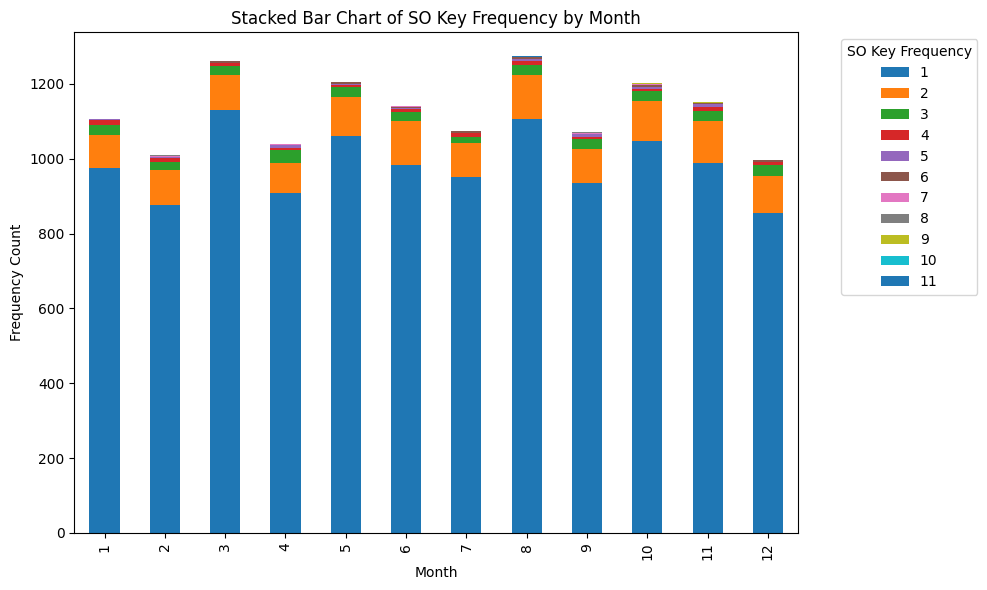

In [14]:
billto_plot = billto_itemfrequency.copy()

# Extract the month (or another period) from 'invc_date' for grouping
billto_plot['month'] = billto_plot['invc_date'].dt.month

# Aggregate data: Count occurrences of each 'so_key_frequency' within each 'month'
aggregated_data = billto_plot.groupby(['month', 'so_key_frequency']).size().reset_index(name='count')

# Step 2: Pivot the Data
pivoted_data = aggregated_data.pivot(index='month', columns='so_key_frequency', values='count').fillna(0)

# Step 3: Create the Stacked Bar Chart
pivoted_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Chart of SO Key Frequency by Month')
plt.xlabel('Month')
plt.ylabel('Frequency Count')
plt.legend(title='SO Key Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [15]:
billto_itemfrequency

,bill_to,invc_date,item_cde,so_key,qty_ship,so_key_frequency
0,03001971,2023-01-04,"[10329848, 10741667]","[7541163266, 7541168570]","[2.0, 3.0]",2
1,03001971,2023-01-25,"[10477982, 10477982, 20037815]","[7606007106, 7606007182, 7606005565]","[3.0, 2.0, 3.0]",3
2,03001971,2023-01-31,[10774631],[7621113409],[6.0],1
3,03001971,2023-02-14,[10298253],[7657007116],[14.0],1
4,03001971,2023-02-20,[11153989],[7670629493],[15.0],1
...,...,...,...,...,...,...
13528,PC967039,2023-04-10,"[10098323, 10504858, 10941576]","[7804154774, 7804154774, 7804154774]","[2.0, 3.0, 2.0]",1
13529,PC967039,2023-08-23,[11056867],[8133754934],[6.0],1
13530,PC967039,2023-09-15,"[10042792, 10098323, 10504858, 10728685]","[8186727717, 8186727717, 8186727717, 8186727717]","[1.0, 2.0, 2.0, 12.0]",1
13531,PC967039,2023-09-19,[11056867],[8191868017],[6.0],1


**2/21/2024:**
I am thinking about maybe we can group by 

1. Longer period - weekly or monthy
2. Only group by `bill_to` to focus on customer's purchase history within the dataset time frame
3. If there are more attributes to consider in the groupby

**UPDATE 2/22/2024:**

1. Decide to compute the average items ordered for each cutomer in a given year or time frame, and obtain baskets from that

## Compute Average Number of Orders

In [16]:
transactions_grpby_bill_to = billto_itemfrequency.groupby(['bill_to']).agg(
    invc_date=('invc_date', list),
    item_cde=('item_cde', list),
    so_key=('so_key', list),
    qty_ship=('qty_ship', list),
    so_key_frequency=('so_key_frequency', 'sum')
).reset_index()

In [17]:
transactions_grpby_bill_to

,bill_to,invc_date,item_cde,so_key,qty_ship,so_key_frequency
0,03001971,"[2023-01-04 00:00:00, 2023-01-25 00:00:00, 202...","[[10329848, 10741667], [10477982, 10477982, 20...","[[7541163266, 7541168570], [7606007106, 760600...","[[2.0, 3.0], [3.0, 2.0, 3.0], [6.0], [14.0], [...",54
1,03008911,[2023-11-16 00:00:00],[[10298253]],[[8302872060]],[[5.0]],1
2,03013113,"[2023-01-23 00:00:00, 2023-02-07 00:00:00, 202...","[[10298253], [10298253], [10766038], [10766038...","[[7587051612], [7638912015], [7753278390], [79...","[[5.0], [4.0], [7500.0], [10000.0], [2000.0], ...",7
3,03014505,"[2023-03-10 00:00:00, 2023-09-20 00:00:00, 202...","[[10043274], [10043274], [10043274], [10043274]]","[[7727936815], [8195454352], [8248270322], [83...","[[1.0], [1.0], [1.0], [1.0]]",4
4,03018372,"[2023-01-04 00:00:00, 2023-01-05 00:00:00, 202...","[[10389081, 10717864], [10063275, 10748820], [...","[[7541158647, 7541158647], [7544626877, 754462...","[[2.0, 1.0], [1.0, 6.0], [2.0], [1.0], [1.0], ...",49
...,...,...,...,...,...,...
1325,PC958500,"[2023-01-06 00:00:00, 2023-01-17 00:00:00, 202...","[[10031387, 10941576], [10058192], [10728034],...","[[7548088383, 7548088383], [7573130419], [7580...","[[3.0, 1.0], [30.0], [1.0], [8.0], [42.0, 1.0]...",41
1326,PC959583,"[2023-01-06 00:00:00, 2023-02-14 00:00:00]","[[10043271, 10741667], [10741678]]","[[7548078062, 7548078062], [7657012179]]","[[2.0, 14.0], [4.0]]",2
1327,PC962807,"[2023-07-31 00:00:00, 2023-08-07 00:00:00, 202...","[[10504858], [10504858], [10650665], [10650665...","[[8076540478], [8093165334], [8153785940], [81...","[[1.0], [6.0], [3.0], [7.0], [1.0], [6.0], [10...",8
1328,PC965322,"[2023-01-04 00:00:00, 2023-02-03 00:00:00, 202...","[[10728537], [10519002], [10519002], [10519002...","[[7541156253], [7631592237], [7638919064], [76...","[[4.0], [306.0], [94.0], [200.0], [4.0], [2.0]...",11


In [18]:
# Create the dictionary mapping invc_date to item_cde for each row
def create_date_to_item_dict(row):
    return dict(zip(row['invc_date'], row['item_cde']))

# Apply the function to create the dictionary
transactions_grpby_bill_to['invc_date_TO_item_cde'] = transactions_grpby_bill_to.apply(create_date_to_item_dict, axis=1)

display(transactions_grpby_bill_to)

,bill_to,invc_date,item_cde,so_key,qty_ship,so_key_frequency,invc_date_TO_item_cde
0,03001971,"[2023-01-04 00:00:00, 2023-01-25 00:00:00, 202...","[[10329848, 10741667], [10477982, 10477982, 20...","[[7541163266, 7541168570], [7606007106, 760600...","[[2.0, 3.0], [3.0, 2.0, 3.0], [6.0], [14.0], [...",54,"{2023-01-04 00:00:00: [10329848, 10741667], 20..."
1,03008911,[2023-11-16 00:00:00],[[10298253]],[[8302872060]],[[5.0]],1,{2023-11-16 00:00:00: [10298253]}
2,03013113,"[2023-01-23 00:00:00, 2023-02-07 00:00:00, 202...","[[10298253], [10298253], [10766038], [10766038...","[[7587051612], [7638912015], [7753278390], [79...","[[5.0], [4.0], [7500.0], [10000.0], [2000.0], ...",7,"{2023-01-23 00:00:00: [10298253], 2023-02-07 0..."
3,03014505,"[2023-03-10 00:00:00, 2023-09-20 00:00:00, 202...","[[10043274], [10043274], [10043274], [10043274]]","[[7727936815], [8195454352], [8248270322], [83...","[[1.0], [1.0], [1.0], [1.0]]",4,"{2023-03-10 00:00:00: [10043274], 2023-09-20 0..."
4,03018372,"[2023-01-04 00:00:00, 2023-01-05 00:00:00, 202...","[[10389081, 10717864], [10063275, 10748820], [...","[[7541158647, 7541158647], [7544626877, 754462...","[[2.0, 1.0], [1.0, 6.0], [2.0], [1.0], [1.0], ...",49,"{2023-01-04 00:00:00: [10389081, 10717864], 20..."
...,...,...,...,...,...,...,...
1325,PC958500,"[2023-01-06 00:00:00, 2023-01-17 00:00:00, 202...","[[10031387, 10941576], [10058192], [10728034],...","[[7548088383, 7548088383], [7573130419], [7580...","[[3.0, 1.0], [30.0], [1.0], [8.0], [42.0, 1.0]...",41,"{2023-01-06 00:00:00: [10031387, 10941576], 20..."
1326,PC959583,"[2023-01-06 00:00:00, 2023-02-14 00:00:00]","[[10043271, 10741667], [10741678]]","[[7548078062, 7548078062], [7657012179]]","[[2.0, 14.0], [4.0]]",2,"{2023-01-06 00:00:00: [10043271, 10741667], 20..."
1327,PC962807,"[2023-07-31 00:00:00, 2023-08-07 00:00:00, 202...","[[10504858], [10504858], [10650665], [10650665...","[[8076540478], [8093165334], [8153785940], [81...","[[1.0], [6.0], [3.0], [7.0], [1.0], [6.0], [10...",8,"{2023-07-31 00:00:00: [10504858], 2023-08-07 0..."
1328,PC965322,"[2023-01-04 00:00:00, 2023-02-03 00:00:00, 202...","[[10728537], [10519002], [10519002], [10519002...","[[7541156253], [7631592237], [7638919064], [76...","[[4.0], [306.0], [94.0], [200.0], [4.0], [2.0]...",11,"{2023-01-04 00:00:00: [10728537], 2023-02-03 0..."


In [19]:
# Obtain the time span within the transaction dataframe by using max - min
transactions_grpby_bill_to['time_span_min_max'] = transactions_grpby_bill_to['invc_date'].apply(lambda x: (max(x) - min(x)).days)

In [20]:
display(transactions_grpby_bill_to)

,bill_to,invc_date,item_cde,so_key,qty_ship,so_key_frequency,invc_date_TO_item_cde,time_span_min_max
0,03001971,"[2023-01-04 00:00:00, 2023-01-25 00:00:00, 202...","[[10329848, 10741667], [10477982, 10477982, 20...","[[7541163266, 7541168570], [7606007106, 760600...","[[2.0, 3.0], [3.0, 2.0, 3.0], [6.0], [14.0], [...",54,"{2023-01-04 00:00:00: [10329848, 10741667], 20...",357
1,03008911,[2023-11-16 00:00:00],[[10298253]],[[8302872060]],[[5.0]],1,{2023-11-16 00:00:00: [10298253]},0
2,03013113,"[2023-01-23 00:00:00, 2023-02-07 00:00:00, 202...","[[10298253], [10298253], [10766038], [10766038...","[[7587051612], [7638912015], [7753278390], [79...","[[5.0], [4.0], [7500.0], [10000.0], [2000.0], ...",7,"{2023-01-23 00:00:00: [10298253], 2023-02-07 0...",280
3,03014505,"[2023-03-10 00:00:00, 2023-09-20 00:00:00, 202...","[[10043274], [10043274], [10043274], [10043274]]","[[7727936815], [8195454352], [8248270322], [83...","[[1.0], [1.0], [1.0], [1.0]]",4,"{2023-03-10 00:00:00: [10043274], 2023-09-20 0...",265
4,03018372,"[2023-01-04 00:00:00, 2023-01-05 00:00:00, 202...","[[10389081, 10717864], [10063275, 10748820], [...","[[7541158647, 7541158647], [7544626877, 754462...","[[2.0, 1.0], [1.0, 6.0], [2.0], [1.0], [1.0], ...",49,"{2023-01-04 00:00:00: [10389081, 10717864], 20...",343
...,...,...,...,...,...,...,...,...
1325,PC958500,"[2023-01-06 00:00:00, 2023-01-17 00:00:00, 202...","[[10031387, 10941576], [10058192], [10728034],...","[[7548088383, 7548088383], [7573130419], [7580...","[[3.0, 1.0], [30.0], [1.0], [8.0], [42.0, 1.0]...",41,"{2023-01-06 00:00:00: [10031387, 10941576], 20...",350
1326,PC959583,"[2023-01-06 00:00:00, 2023-02-14 00:00:00]","[[10043271, 10741667], [10741678]]","[[7548078062, 7548078062], [7657012179]]","[[2.0, 14.0], [4.0]]",2,"{2023-01-06 00:00:00: [10043271, 10741667], 20...",39
1327,PC962807,"[2023-07-31 00:00:00, 2023-08-07 00:00:00, 202...","[[10504858], [10504858], [10650665], [10650665...","[[8076540478], [8093165334], [8153785940], [81...","[[1.0], [6.0], [3.0], [7.0], [1.0], [6.0], [10...",8,"{2023-07-31 00:00:00: [10504858], 2023-08-07 0...",140
1328,PC965322,"[2023-01-04 00:00:00, 2023-02-03 00:00:00, 202...","[[10728537], [10519002], [10519002], [10519002...","[[7541156253], [7631592237], [7638919064], [76...","[[4.0], [306.0], [94.0], [200.0], [4.0], [2.0]...",11,"{2023-01-04 00:00:00: [10728537], 2023-02-03 0...",341


In [21]:
# Calculate the average time that the customer order items by
# avg_time_interval = time_span/item_count
# For customers who only order 1 item (time_span = 0), we set avg_time_interval = 1 ?

def calculate_avg_time_interval(row):
    if row['so_key_frequency'] == 1:
        return 1  # Set avg_time_interval = 1 for customers who ordered only 1 item
    else:
        return row['time_span_min_max'] / row['so_key_frequency']


transactions_grpby_bill_to['avg_interval'] = transactions_grpby_bill_to.apply(calculate_avg_time_interval, axis=1)

In [22]:
# transactions_grpby_bill_to

**UPDATE 2/26/2024**

Shashi suggests that instead of calculating the average time interval by 

$$(\max{(\text{date})} - \min{(\text{date})})\over \text{so\_key\_frequency}$$ 

we can first sum across the time interval (in days) between invc_date. Then we devide the sum of time interval to calculate the average order intervals. We will then use that for hard cut-offs.

**UPDATE 2/26/2024**

We realize it is the same as the previous method because

$$
\begin{aligned}
\sum{} &= (d_2 - d_1) + (d_3 - d_2) + \cdots + (d_n - d_{n-1}) \\
    &= d_n - d_1
\end{aligned}
$$

In [23]:
# # Obtain the time span within the transaction dataframe by sum across interval first
# # then divide by so_key_frequency

# def calculate_time_span(dates):
#     if len(dates) > 1:
#         # Calculate differences between consecutive dates
#         differences = [dates[i+1] - dates[i] for i in range(len(dates)-1)]
#         # Sum the differences
#         total_span = sum(differences, pd.Timedelta(0))
#         return total_span
#     else:
#         # Return 0 days if there's only one date
#         return pd.Timedelta(0)

In [24]:
# transactions_grpby_bill_to['time_span_by_interval'] = transactions_grpby_bill_to['invc_date'].apply(calculate_time_span)

In [25]:
# transactions_grpby_bill_to['time_span_by_interval'] = transactions_grpby_bill_to['time_span_by_interval'].dt.days

In [26]:
transactions_grpby_bill_to

,bill_to,invc_date,item_cde,so_key,qty_ship,so_key_frequency,invc_date_TO_item_cde,time_span_min_max,avg_interval
0,03001971,"[2023-01-04 00:00:00, 2023-01-25 00:00:00, 202...","[[10329848, 10741667], [10477982, 10477982, 20...","[[7541163266, 7541168570], [7606007106, 760600...","[[2.0, 3.0], [3.0, 2.0, 3.0], [6.0], [14.0], [...",54,"{2023-01-04 00:00:00: [10329848, 10741667], 20...",357,6.611111
1,03008911,[2023-11-16 00:00:00],[[10298253]],[[8302872060]],[[5.0]],1,{2023-11-16 00:00:00: [10298253]},0,1.000000
2,03013113,"[2023-01-23 00:00:00, 2023-02-07 00:00:00, 202...","[[10298253], [10298253], [10766038], [10766038...","[[7587051612], [7638912015], [7753278390], [79...","[[5.0], [4.0], [7500.0], [10000.0], [2000.0], ...",7,"{2023-01-23 00:00:00: [10298253], 2023-02-07 0...",280,40.000000
3,03014505,"[2023-03-10 00:00:00, 2023-09-20 00:00:00, 202...","[[10043274], [10043274], [10043274], [10043274]]","[[7727936815], [8195454352], [8248270322], [83...","[[1.0], [1.0], [1.0], [1.0]]",4,"{2023-03-10 00:00:00: [10043274], 2023-09-20 0...",265,66.250000
4,03018372,"[2023-01-04 00:00:00, 2023-01-05 00:00:00, 202...","[[10389081, 10717864], [10063275, 10748820], [...","[[7541158647, 7541158647], [7544626877, 754462...","[[2.0, 1.0], [1.0, 6.0], [2.0], [1.0], [1.0], ...",49,"{2023-01-04 00:00:00: [10389081, 10717864], 20...",343,7.000000
...,...,...,...,...,...,...,...,...,...
1325,PC958500,"[2023-01-06 00:00:00, 2023-01-17 00:00:00, 202...","[[10031387, 10941576], [10058192], [10728034],...","[[7548088383, 7548088383], [7573130419], [7580...","[[3.0, 1.0], [30.0], [1.0], [8.0], [42.0, 1.0]...",41,"{2023-01-06 00:00:00: [10031387, 10941576], 20...",350,8.536585
1326,PC959583,"[2023-01-06 00:00:00, 2023-02-14 00:00:00]","[[10043271, 10741667], [10741678]]","[[7548078062, 7548078062], [7657012179]]","[[2.0, 14.0], [4.0]]",2,"{2023-01-06 00:00:00: [10043271, 10741667], 20...",39,19.500000
1327,PC962807,"[2023-07-31 00:00:00, 2023-08-07 00:00:00, 202...","[[10504858], [10504858], [10650665], [10650665...","[[8076540478], [8093165334], [8153785940], [81...","[[1.0], [6.0], [3.0], [7.0], [1.0], [6.0], [10...",8,"{2023-07-31 00:00:00: [10504858], 2023-08-07 0...",140,17.500000
1328,PC965322,"[2023-01-04 00:00:00, 2023-02-03 00:00:00, 202...","[[10728537], [10519002], [10519002], [10519002...","[[7541156253], [7631592237], [7638919064], [76...","[[4.0], [306.0], [94.0], [200.0], [4.0], [2.0]...",11,"{2023-01-04 00:00:00: [10728537], 2023-02-03 0...",341,31.000000


**Update 3/6/2024**:

1. For customers with average timeline value <7, set the average timeline to 7 and regenerate the baskets.
2. Once the previous thing is done, we need to resample the baskets cyclically (we discussed this method earlier). I.e, Instead of starting a new basket form an item outside the timeline, we start from every item.

In [27]:
# For step 1:
transactions_grpby_bill_to['avg_interval'] = transactions_grpby_bill_to['avg_interval'].apply(lambda x: x if x >= 7 else 7)

In [28]:
transactions_grpby_bill_to

,bill_to,invc_date,item_cde,so_key,qty_ship,so_key_frequency,invc_date_TO_item_cde,time_span_min_max,avg_interval
0,03001971,"[2023-01-04 00:00:00, 2023-01-25 00:00:00, 202...","[[10329848, 10741667], [10477982, 10477982, 20...","[[7541163266, 7541168570], [7606007106, 760600...","[[2.0, 3.0], [3.0, 2.0, 3.0], [6.0], [14.0], [...",54,"{2023-01-04 00:00:00: [10329848, 10741667], 20...",357,7.000000
1,03008911,[2023-11-16 00:00:00],[[10298253]],[[8302872060]],[[5.0]],1,{2023-11-16 00:00:00: [10298253]},0,7.000000
2,03013113,"[2023-01-23 00:00:00, 2023-02-07 00:00:00, 202...","[[10298253], [10298253], [10766038], [10766038...","[[7587051612], [7638912015], [7753278390], [79...","[[5.0], [4.0], [7500.0], [10000.0], [2000.0], ...",7,"{2023-01-23 00:00:00: [10298253], 2023-02-07 0...",280,40.000000
3,03014505,"[2023-03-10 00:00:00, 2023-09-20 00:00:00, 202...","[[10043274], [10043274], [10043274], [10043274]]","[[7727936815], [8195454352], [8248270322], [83...","[[1.0], [1.0], [1.0], [1.0]]",4,"{2023-03-10 00:00:00: [10043274], 2023-09-20 0...",265,66.250000
4,03018372,"[2023-01-04 00:00:00, 2023-01-05 00:00:00, 202...","[[10389081, 10717864], [10063275, 10748820], [...","[[7541158647, 7541158647], [7544626877, 754462...","[[2.0, 1.0], [1.0, 6.0], [2.0], [1.0], [1.0], ...",49,"{2023-01-04 00:00:00: [10389081, 10717864], 20...",343,7.000000
...,...,...,...,...,...,...,...,...,...
1325,PC958500,"[2023-01-06 00:00:00, 2023-01-17 00:00:00, 202...","[[10031387, 10941576], [10058192], [10728034],...","[[7548088383, 7548088383], [7573130419], [7580...","[[3.0, 1.0], [30.0], [1.0], [8.0], [42.0, 1.0]...",41,"{2023-01-06 00:00:00: [10031387, 10941576], 20...",350,8.536585
1326,PC959583,"[2023-01-06 00:00:00, 2023-02-14 00:00:00]","[[10043271, 10741667], [10741678]]","[[7548078062, 7548078062], [7657012179]]","[[2.0, 14.0], [4.0]]",2,"{2023-01-06 00:00:00: [10043271, 10741667], 20...",39,19.500000
1327,PC962807,"[2023-07-31 00:00:00, 2023-08-07 00:00:00, 202...","[[10504858], [10504858], [10650665], [10650665...","[[8076540478], [8093165334], [8153785940], [81...","[[1.0], [6.0], [3.0], [7.0], [1.0], [6.0], [10...",8,"{2023-07-31 00:00:00: [10504858], 2023-08-07 0...",140,17.500000
1328,PC965322,"[2023-01-04 00:00:00, 2023-02-03 00:00:00, 202...","[[10728537], [10519002], [10519002], [10519002...","[[7541156253], [7631592237], [7638919064], [76...","[[4.0], [306.0], [94.0], [200.0], [4.0], [2.0]...",11,"{2023-01-04 00:00:00: [10728537], 2023-02-03 0...",341,31.000000


In [29]:
# Save data for inspection
transactions_grpby_bill_to.to_csv("transactions_groupby_bill_to.csv", index=False)

**UPDATE 2/25/2024:**

Sree suggests updates for the `create_baskets(function)`

1. Instead of iterating from start date to end date, iterate through all 365 days while forming the baskets.
2. If date(in day)+interval > 365, make a condition to take items from start.
3. Use `set()` to store items to handle duplicates.

The updated function is named `create_baskets_365`.

*Things to discuss and consider:*

1. Rounding the of the average interval. Currently, it rounds to the nearest whole number
2. Will caused problem if the dataset spans mutiple years
3. Should we use set to handle duplicates - since it removes frequency information

**UPDATE 2/26/2024**

We decided to roll back the function as Sree suggested without resampling.

In [30]:
def create_baskets(row):
    baskets = []
    dates_items = row['invc_date_TO_item_cde']
    avg_interval = row['avg_interval']

    # Extract and sort the dates to ensure they are processed in chronological order
    dates = sorted(dates_items.keys())
    
    i = 0
    while i < len(dates):
        current_date = dates[i]
        current_basket = set(dates_items[current_date])  # Use a set to avoid duplicates
        
        # Calculate the end of the current interval
        interval_end = current_date + timedelta(days=avg_interval)
        
        # Move to the next date to check if it falls within the current interval
        i += 1
        while i < len(dates) and dates[i] <= interval_end:
            # Add items to the current basket since they are within the range
            current_basket.update(dates_items[dates[i]])
            i += 1  # Move to the next date
        
        # Add the current basket to the list of baskets, converting it back to a list
        baskets.append(list(current_basket))
    
    return baskets

In [31]:
transactions_basket = transactions_grpby_bill_to.copy()
transactions_basket['baskets'] = transactions_basket.apply(create_baskets, axis=1)

In [32]:
transactions_basket

,bill_to,invc_date,item_cde,so_key,qty_ship,so_key_frequency,invc_date_TO_item_cde,time_span_min_max,avg_interval,baskets
0,03001971,"[2023-01-04 00:00:00, 2023-01-25 00:00:00, 202...","[[10329848, 10741667], [10477982, 10477982, 20...","[[7541163266, 7541168570], [7606007106, 760600...","[[2.0, 3.0], [3.0, 2.0, 3.0], [6.0], [14.0], [...",54,"{2023-01-04 00:00:00: [10329848, 10741667], 20...",357,7.000000,"[[10329848, 10741667], [10774631, 10477982, 20..."
1,03008911,[2023-11-16 00:00:00],[[10298253]],[[8302872060]],[[5.0]],1,{2023-11-16 00:00:00: [10298253]},0,7.000000,[[10298253]]
2,03013113,"[2023-01-23 00:00:00, 2023-02-07 00:00:00, 202...","[[10298253], [10298253], [10766038], [10766038...","[[7587051612], [7638912015], [7753278390], [79...","[[5.0], [4.0], [7500.0], [10000.0], [2000.0], ...",7,"{2023-01-23 00:00:00: [10298253], 2023-02-07 0...",280,40.000000,"[[10298253], [10766038], [10735682, 10766038],..."
3,03014505,"[2023-03-10 00:00:00, 2023-09-20 00:00:00, 202...","[[10043274], [10043274], [10043274], [10043274]]","[[7727936815], [8195454352], [8248270322], [83...","[[1.0], [1.0], [1.0], [1.0]]",4,"{2023-03-10 00:00:00: [10043274], 2023-09-20 0...",265,66.250000,"[[10043274], [10043274], [10043274]]"
4,03018372,"[2023-01-04 00:00:00, 2023-01-05 00:00:00, 202...","[[10389081, 10717864], [10063275, 10748820], [...","[[7541158647, 7541158647], [7544626877, 754462...","[[2.0, 1.0], [1.0, 6.0], [2.0], [1.0], [1.0], ...",49,"{2023-01-04 00:00:00: [10389081, 10717864], 20...",343,7.000000,"[[10717864, 10389081, 10063275, 10748820], [10..."
...,...,...,...,...,...,...,...,...,...,...
1325,PC958500,"[2023-01-06 00:00:00, 2023-01-17 00:00:00, 202...","[[10031387, 10941576], [10058192], [10728034],...","[[7548088383, 7548088383], [7573130419], [7580...","[[3.0, 1.0], [30.0], [1.0], [8.0], [42.0, 1.0]...",41,"{2023-01-06 00:00:00: [10031387, 10941576], 20...",350,8.536585,"[[10941576, 10031387], [10058192, 10728034], [..."
1326,PC959583,"[2023-01-06 00:00:00, 2023-02-14 00:00:00]","[[10043271, 10741667], [10741678]]","[[7548078062, 7548078062], [7657012179]]","[[2.0, 14.0], [4.0]]",2,"{2023-01-06 00:00:00: [10043271, 10741667], 20...",39,19.500000,"[[10741667, 10043271], [10741678]]"
1327,PC962807,"[2023-07-31 00:00:00, 2023-08-07 00:00:00, 202...","[[10504858], [10504858], [10650665], [10650665...","[[8076540478], [8093165334], [8153785940], [81...","[[1.0], [6.0], [3.0], [7.0], [1.0], [6.0], [10...",8,"{2023-07-31 00:00:00: [10504858], 2023-08-07 0...",140,17.500000,"[[10504858], [10650665], [10817282], [10817282..."
1328,PC965322,"[2023-01-04 00:00:00, 2023-02-03 00:00:00, 202...","[[10728537], [10519002], [10519002], [10519002...","[[7541156253], [7631592237], [7638919064], [76...","[[4.0], [306.0], [94.0], [200.0], [4.0], [2.0]...",11,"{2023-01-04 00:00:00: [10728537], 2023-02-03 0...",341,31.000000,"[[10728537, 10519002], [10519002, 10023180], [..."


In [33]:
transactions_basket.to_csv('transactions_basket_7Min.csv', index=False)

In [34]:
def create_baskets_365(row):
    baskets = []
    dates_items = row['invc_date_TO_item_cde']
    avg_interval = round(row['avg_interval'])  # Round to nearest whole number - need to discuss

    # Convert datetime dates to day of year (1-365)
    day_to_items = {}
    for date, items in dates_items.items():
        day_of_year = date.timetuple().tm_yday
        if day_of_year in day_to_items:
            day_to_items[day_of_year].update(items)
        else:
            day_to_items[day_of_year] = set(items)

    # Iterate through all 365 days
    for day in range(1, 366):
        if day in day_to_items:
            current_basket = day_to_items[day]
        else:
            continue  # Skip days without purchases

        # Look ahead within the interval, considering wrap around
        for delta in range(1, avg_interval + 1):
            next_day = (day + delta - 1) % 365 + 1  # Wrap around if exceeds 365
            if next_day in day_to_items:
                current_basket.update(day_to_items[next_day])

        if current_basket:  # Only add non-empty baskets
            baskets.append(list(current_basket))  # Converting it back to a list

    return baskets

In [35]:
transactions_basket_365 = transactions_grpby_bill_to.copy()
transactions_basket_365['baskets'] = transactions_basket_365.apply(create_baskets_365, axis=1)

In [36]:
transactions_basket_365.to_csv('transactions_basket_7Min_resample.csv', index=False)
transactions_basket_365

,bill_to,invc_date,item_cde,so_key,qty_ship,so_key_frequency,invc_date_TO_item_cde,time_span_min_max,avg_interval,baskets
0,03001971,"[2023-01-04 00:00:00, 2023-01-25 00:00:00, 202...","[[10329848, 10741667], [10477982, 10477982, 20...","[[7541163266, 7541168570], [7606007106, 760600...","[[2.0, 3.0], [3.0, 2.0, 3.0], [6.0], [14.0], [...",54,"{2023-01-04 00:00:00: [10329848, 10741667], 20...",357,7.000000,"[[10329848, 10741667], [10774631, 10477982, 20..."
1,03008911,[2023-11-16 00:00:00],[[10298253]],[[8302872060]],[[5.0]],1,{2023-11-16 00:00:00: [10298253]},0,7.000000,[[10298253]]
2,03013113,"[2023-01-23 00:00:00, 2023-02-07 00:00:00, 202...","[[10298253], [10298253], [10766038], [10766038...","[[7587051612], [7638912015], [7753278390], [79...","[[5.0], [4.0], [7500.0], [10000.0], [2000.0], ...",7,"{2023-01-23 00:00:00: [10298253], 2023-02-07 0...",280,40.000000,"[[10298253], [10298253], [10766038], [10735682..."
3,03014505,"[2023-03-10 00:00:00, 2023-09-20 00:00:00, 202...","[[10043274], [10043274], [10043274], [10043274]]","[[7727936815], [8195454352], [8248270322], [83...","[[1.0], [1.0], [1.0], [1.0]]",4,"{2023-03-10 00:00:00: [10043274], 2023-09-20 0...",265,66.250000,"[[10043274], [10043274], [10043274], [10043274]]"
4,03018372,"[2023-01-04 00:00:00, 2023-01-05 00:00:00, 202...","[[10389081, 10717864], [10063275, 10748820], [...","[[7541158647, 7541158647], [7544626877, 754462...","[[2.0, 1.0], [1.0, 6.0], [2.0], [1.0], [1.0], ...",49,"{2023-01-04 00:00:00: [10389081, 10717864], 20...",343,7.000000,"[[10717864, 10389081, 10063275, 10748820], [10..."
...,...,...,...,...,...,...,...,...,...,...
1325,PC958500,"[2023-01-06 00:00:00, 2023-01-17 00:00:00, 202...","[[10031387, 10941576], [10058192], [10728034],...","[[7548088383, 7548088383], [7573130419], [7580...","[[3.0, 1.0], [30.0], [1.0], [8.0], [42.0, 1.0]...",41,"{2023-01-06 00:00:00: [10031387, 10941576], 20...",350,8.536585,"[[10941576, 10031387], [10058192, 10728034], [..."
1326,PC959583,"[2023-01-06 00:00:00, 2023-02-14 00:00:00]","[[10043271, 10741667], [10741678]]","[[7548078062, 7548078062], [7657012179]]","[[2.0, 14.0], [4.0]]",2,"{2023-01-06 00:00:00: [10043271, 10741667], 20...",39,19.500000,"[[10741667, 10043271], [10741678]]"
1327,PC962807,"[2023-07-31 00:00:00, 2023-08-07 00:00:00, 202...","[[10504858], [10504858], [10650665], [10650665...","[[8076540478], [8093165334], [8153785940], [81...","[[1.0], [6.0], [3.0], [7.0], [1.0], [6.0], [10...",8,"{2023-07-31 00:00:00: [10504858], 2023-08-07 0...",140,17.500000,"[[10504858], [10504858], [10650665], [10650665..."
1328,PC965322,"[2023-01-04 00:00:00, 2023-02-03 00:00:00, 202...","[[10728537], [10519002], [10519002], [10519002...","[[7541156253], [7631592237], [7638919064], [76...","[[4.0], [306.0], [94.0], [200.0], [4.0], [2.0]...",11,"{2023-01-04 00:00:00: [10728537], 2023-02-03 0...",341,31.000000,"[[10728537, 10519002], [10519002, 10023180], [..."


In [ ]:
# def create_baskets(row):
#     baskets = []
#     dates_items = row['invc_date_TO_item_cde']
#     avg_interval = row['avg_interval']

#     dates = [date for date in dates_items.keys()]
#     # Sort dates to ensure correct order
#     dates.sort()
    
#     for i, date in enumerate(dates):
#         # Initialize the current basket with the current date's items
#         current_basket = list(dates_items[date])
#         for j in range(i+1, len(dates)):
#             next_date = dates[j]
#             # Check if next_date is within the avg_interval from date
#             if (next_date - date).days <= avg_interval:
#                 # Add items from next_date to the current basket
#                 current_basket.extend(dates_items[next_date])
#             else:
#                 # If next_date is outside the interval, break the loop as subsequent dates will be further away
#                 break
#         baskets.append(list(current_basket))
    
#     return baskets

In [ ]:
# def create_baskets_with_backward(rows):
#     baskets = []
#     dates_items = rows['invc_date_TO_item_cde']
#     avg_interval = rows['avg_interval']

#     dates = [date for date in dates_items.keys()]
#     dates.sort()

#     for i, date in enumerate(dates):
#         current_basket = list(dates_items[date])
#         for j in range(i+1, len(dates)):
#             next_date = dates[j]
#             if (next_date - date).days <= avg_interval:
#                 current_basket.extend(dates_items[next_date])
#             else:
#                 break
#         baskets.append((date, list(current_basket)))

#     # Attempt to merge baskets backward based on the avg_interval
#     # This is case, we look from the back and see if we can merge with preceding basket based on avg_interval
#     # However, we might generated a lot overlapped baskset if we doing this way
    
#     merged_baskets = []
#     i = 0
#     while i < len(baskets):
#         if i == 0:
#             merged_baskets.append(baskets[i][1])
#         else:
#             current_start_date, current_basket_items = baskets[i]
#             prev_start_date, prev_basket_items = baskets[i - 1]

#             # Check if the current basket's start date is within the avg_interval of the previous basket's start date
#             if (current_start_date - prev_start_date).days <= avg_interval:
#                 # Merge current basket with the previous one
#                 merged_baskets[-1].extend(current_basket_items)
#             else:
#                 merged_baskets.append(current_basket_items)
#         i += 1

#     return merged_baskets

In [ ]:
# transactions_basket = transactions_grpby_bill_to.copy()
# transactions_basket['baskets'] = transactions_basket.apply(create_baskets, axis=1)

In [ ]:
# transactions_basket_backward = transactions_grpby_bill_to.copy()
# transactions_basket_backward['baskets'] = transactions_basket_backward.apply(create_baskets_with_backward, axis=1)

In [ ]:
# transactions_basket.to_csv('transactions_basket.csv', index=False)
# transactions_basket_backward.to_csv('transactions_basket_backward.csv', index=False)

In [ ]:
# transactions_basket

Other functions that I tried but seems not work as expected

In [ ]:
# def create_baskets(row):
#     # Sort the dictionary by date (key)
#     sorted_dates_items = sorted(row['invc_date_TO_item_cde'].items(), key=lambda x: x[0])
    
#     baskets = []
#     current_basket = []
#     current_end_date = None
    
#     for date, items in sorted_dates_items:
#         # Note: I have not implemented a way to cycle back to the start of the year yet
        
#         if current_end_date is None or date > current_end_date:
#             # Start a new basket if there's no current basket 
#             # or the current date is beyond the range of the current basket
#             if current_basket:
#                 baskets.append(current_basket)
#             current_basket = items  # Start new basket with current items
#             current_end_date = date + timedelta(days=row['avg_interval'])
#         else:
#             # Add items to current basket
#             current_basket.extend(items)
    
#     # Need to think about how to handle the last basket
#     if current_basket:
#         baskets.append(current_basket)
    
#     return baskets

In [ ]:
# def create_baskets(row):
#     # Extract the dictionary and avg_interval
#     date_to_item = row['invc_date_TO_item_cde']
#     avg_interval = row['avg_interval']
    
#     # Convert keys to sorted list of timestamps for comparison
#     sorted_dates = sorted(date_to_item.keys())
    
#     baskets = []
#     current_basket = []
#     last_date = None
    
#     for date in sorted_dates:
#         if last_date is None or (date - last_date).days <= avg_interval:
#             # Add to current basket
#             current_basket.extend(date_to_item[date])
#         else:
#             # New basket if the interval is exceeded
#             if current_basket:
#                 baskets.append(current_basket)
#             current_basket = date_to_item[date]
        
#         last_date = date
    
#     # Add the last basket if not empty
#     if current_basket:
#         baskets.append(current_basket)
    
#     return baskets

## Apriori

In [ ]:
# Flatten each list of lists of lists into a single list
dataset = [item for sublist in transactions_basket['baskets'] for item in sublist]

In [ ]:
len(dataset)

In [ ]:
dataset[:10]

In [ ]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [ ]:
%%time
frequent_itemsets = apriori(df, min_support=0.001, use_colnames=True)

In [ ]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

In [ ]:
two_or_more = frequent_itemsets[(frequent_itemsets['length'] >= 2)]
display(two_or_more)

Can play with this DataFrame and see if we have actual supports from the original dataset.

In [ ]:
two_or_more.iloc[0]['itemsets']

### Check supports

In [ ]:
%%time

# Chceck with transactions_basket

matches_count = 0
total_count = 0

# Iterate over each itemset in two_or_more
for index, row in two_or_more.iterrows():
    itemset = row['itemsets']  # The current itemset to compare
    
    # Compare this itemset with each list of lists in transactions_basket
    for transaction_index, transaction_row in transactions_basket.iterrows():
        total_count += 1
        for item_list in transaction_row['item_cde']:  # Each item_list within the row's list of lists
            if itemset.issubset(item_list):
                matches_count += 1
                break  # If a match is found, no need to check further lists in the same transaction

print(f"Number of matches: {matches_count}")
print(f"Number of totals item pairs: {total_count}")

## Apriori for baskets generated by backward

In [ ]:
# Flatten each list of lists of lists into a single list
dataset = [item for sublist in transactions_basket_backward['baskets'] for item in sublist]

In [ ]:
len(dataset)

In [ ]:
dataset[:10]

In [ ]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [ ]:
%%time
frequent_itemsets = apriori(df, min_support=0.001, use_colnames=True)

In [ ]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

In [ ]:
two_or_more = frequent_itemsets[(frequent_itemsets['length'] >= 2)]
display(two_or_more)

Can play with this DataFrame and see if we have actual supports from the original dataset.

In [ ]:
two_or_more.iloc[0]['itemsets']

### Check supports

In [ ]:
# Chceck with transactions_basket

matches_count = 0
total_count = 0

# Iterate over each itemset in two_or_more
for index, row in two_or_more.iterrows():
    itemset = row['itemsets']  # The current itemset to compare
    
    # Compare this itemset with each list of lists in transactions_basket
    for transaction_index, transaction_row in transactions_basket.iterrows():
        total_count += 1
        for item_list in transaction_row['item_cde']:  # Each item_list within the row's list of lists
            if itemset.issubset(item_list):
                matches_count += 1
                break  # If a match is found, no need to check further lists in the same transaction
                
print(f"Number of matches: {matches_count}")
print(f"Number of totals item pairs: {total_count}")

In [ ]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.9)

# Display the association rules
print(rules)

## Past code

The rest are code that I obtain from you, but I turned some of them into functions to conduct experiments.

In [ ]:
# Function to do EDA on agg data

def get_eda(data):
    # Description
    print("Data description: ")
    display(data.item_count.describe())

    # Plot distribution of basket
    plt.figure(figsize=(5, 4))  
    plt.hist(data['item_count'], bins=40)  
    plt.xlabel('Unique items in sales order')  
    plt.ylabel('Frequency')  
    plt.title('Frequency Distribution of basket sizes') 
    plt.show()

    # Percentage of 2 or more items
    count_two_or_more= sum(n > 1 for n in data['item_count'])
    # Calculate the percentage
    percent_two_or_more = (count_two_or_more / len(data['item_count'])) * 100
    print("Percentage of 2 or more items: ")
    print(percent_two_or_more)

In [ ]:
def recommend_items(item, rules):
    item_rules = rules[rules['antecedents'].apply(lambda x: item in set(x))]
    recommended_items = item_rules['consequents'].explode().unique()
    return recommended_items

# Function to run Apriori

def run_apriori(data, min_support, min_threshold):
    item_pairs=list(data['item_cde'])
    print("Number of item pairs: ", len(item_pairs))

    te = TransactionEncoder()
    te_ary = te.fit(item_pairs).transform(item_pairs)
    df = pd.DataFrame(te_ary, columns=te.columns_)
    
    # Use Apriori algorithm to find frequent itemsets
    frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
    
    # Generate association rules
    rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=min_threshold)

    all_3700_items=list(data_ecom['Item Number'])
    all_recos=[]
    all_recos_nonzero=[]
    items=[]
    
    for ite in all_3700_items:
        reco=recommend_items(ite, rules)
        #print(f"item: {ite}, recommendation: {reco}")
        all_recos.append(reco)
        if len(reco)>0:
            items.append(ite)
            all_recos_nonzero.append(reco)
            print(f"item: {ite}, recommendation: {reco}")

    lengths = [len(sublist) for sublist in all_recos]
    
    # Plot for number of recommended items vs Iiem recommendation count
    length_freq = Counter(lengths)
    
    # Extract lengths and their frequencies for plotting
    lengths = list(length_freq.keys())
    freqs = list(length_freq.values())
    
    # Plot the frequency of sublist lengths
    plt.bar(lengths, freqs)
    plt.xlabel('Number of recommended items')
    plt.ylabel('Items')
    plt.title('Item recommendation count')
    plt.show()


    # Plot for Non_zero number of recommended items vs item recommendation count
    lengths = [len(sublist) for sublist in all_recos_nonzero]
    length_freq = Counter(lengths)
    # Extract lengths and their frequencies for plotting
    lengths = list(length_freq.keys())
    freqs = list(length_freq.values())
    
    # Plot the frequency of sublist lengths
    plt.bar(lengths, freqs)
    plt.xlabel('Number of recommended items')
    plt.ylabel('Items')
    plt.title('Non-zero item recommendation count')
    plt.show()

In [ ]:
run_apriori(weekly_transactions, min_support = 0.001, min_threshold=0.7)

### Monthly

In [ ]:
# Group by 'bill_to' and month-year of 'invc_date'
bill_to_items_month = bill_to_items.copy()

bill_to_items_month['month'] = bill_to_items_month['invc_date'].dt.to_period('M')

In [ ]:
monthly_transactions = bill_to_items_month.groupby(['bill_to', 'month']).agg(
    item_cde=('item_cde', list),
    qty_ships=('qty_ship', list),
    item_count=('item_cde', 'count')
).reset_index()

In [ ]:
monthly_transactions

In [ ]:
get_eda(monthly_transactions)

In [ ]:
run_apriori(monthly_transactions, min_support=0.0015, min_threshold=0.7)

In [ ]:
item_pairs=list(weekly_transactions['item_cde'])
len(item_pairs)

In [ ]:
te = TransactionEncoder()
te_ary = te.fit(item_pairs).transform(item_pairs)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Use Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.001, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)

# Display the association rules
# print(rules)

In [ ]:
def recommend_items(item, rules):
    item_rules = rules[rules['antecedents'].apply(lambda x: item in set(x))]
    recommended_items = item_rules['consequents'].explode().unique()
    return recommended_items

In [ ]:
all_3700_items=list(data_ecom['Item Number'])

all_recos=[]
all_recos_nonzero=[]
items=[]

for ite in all_3700_items:
    reco=recommend_items(ite, rules)
    #print(f"item: {ite}, recommendation: {reco}")
    all_recos.append(reco)
    if len(reco)>0:
        items.append(ite)
        all_recos_nonzero.append(reco)
        print(f"item: {ite}, recommendation: {reco}")


In [ ]:
lengths = [len(sublist) for sublist in all_recos]

from collections import Counter

# Count the frequency of each length
length_freq = Counter(lengths)

# Extract lengths and their frequencies for plotting
lengths = list(length_freq.keys())
freqs = list(length_freq.values())

# Plot the frequency of sublist lengths
plt.bar(lengths, freqs)
plt.xlabel('number of recommended items')
plt.ylabel('items')
plt.title('Item recommendation count')
plt.show()

In [ ]:
lengths = [len(sublist) for sublist in all_recos_nonzero]

from collections import Counter

# Count the frequency of each length
length_freq = Counter(lengths)

# Extract lengths and their frequencies for plotting
lengths = list(length_freq.keys())
freqs = list(length_freq.values())

# Plot the frequency of sublist lengths
plt.bar(lengths, freqs)
plt.xlabel('number of recommended items (nonzero)')
plt.ylabel('items')
plt.title('Item recommendation count')
plt.show()

# If the orders are uniformly distributed
freq - 1 to 10000k
basket upper limit- 30 (keep as variable)
freq of order- 120
every 4 order is treated as one basket

#of orders to be grouped for basket: (freq of order/ basket max size set)

#of orders=20, all 20 can be treated as separate basket

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  
plt.hist(billto_items_qty['item_count'], bins=40)  

plt.xlabel('Unique items in sales order')  
plt.ylabel('Frequency')  
plt.title('Frequency Distribution of basket sizes') 

plt.show()

In [ ]:
count_two_or_more= sum(n > 1 for n in billto_items_qty['item_count'])

# Calculate the percentage
percent_two_or_more = (count_two_or_more / len(billto_items_qty['item_count'])) * 100

In [ ]:
percent_two_or_more

So key level and bill to level transaction baskets show no difference in % of 2 or more items

# think about volume of transaction!?

volume can be a measure of which association is stronger, get volume and $ amount.

In [ ]:
pd.set_option('display.max_colwidth', None)


In [ ]:
cols=data_inter.columns
cols

# Vanilla association rule mining

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
item_pairs=list(billto_items_qty['item_cde'])
item_pairs

In [ ]:

te = TransactionEncoder()
te_ary = te.fit(item_pairs).transform(item_pairs)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Use Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.001, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)

# Display the association rules
print(rules)

In [ ]:
def recommend_items(item, rules):
    item_rules = rules[rules['antecedents'].apply(lambda x: item in set(x))]
    recommended_items = item_rules['consequents'].explode().unique()
    return recommended_items

In [ ]:
recommendations = recommend_items(10805428, rules)
print(f"For item {10805428}, recommended items: {recommendations}")

In [ ]:
all_3700_items=list(data_ecom['Item Number'])

all_recos=[]
all_recos_nonzero=[]
items=[]

for ite in all_3700_items:
    reco=recommend_items(ite, rules)
    #print(f"item: {ite}, recommendation: {reco}")
    all_recos.append(reco)
    if len(reco)>0:
        items.append(ite)
        all_recos_nonzero.append(reco)
        print(f"item: {ite}, recommendation: {reco}")


In [ ]:
lengths = [len(sublist) for sublist in all_recos]

from collections import Counter

# Count the frequency of each length
length_freq = Counter(lengths)

# Extract lengths and their frequencies for plotting
lengths = list(length_freq.keys())
freqs = list(length_freq.values())

# Plot the frequency of sublist lengths
plt.bar(lengths, freqs)
plt.xlabel('number of recommended items')
plt.ylabel('items')
plt.title('Item recommendation count')
plt.show()

In [ ]:
lengths = [len(sublist) for sublist in all_recos_nonzero]

from collections import Counter

# Count the frequency of each length
length_freq = Counter(lengths)

# Extract lengths and their frequencies for plotting
lengths = list(length_freq.keys())
freqs = list(length_freq.values())

# Plot the frequency of sublist lengths
plt.bar(lengths, freqs)
plt.xlabel('number of recommended items')
plt.ylabel('items')
plt.title('Item recommendation count')
plt.show()

In [ ]:
items

In [ ]:
all_recos_nonzero